<a href="https://colab.research.google.com/github/pratyushchry/Data-Analytics-Notebooks/blob/master/Tensorflow_2_0_An_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In mathematics, a **Tensor** is a geometric object describing linear relationships b/w other geometric objects. 

In simpler words, a Tensor is a multi-dimensional array of data, a.k.a **matrix**. 

In [0]:
import tensorflow as tf

c1 = tf.constant([[1,2,3], [1,2,3]])
c2 = tf.constant([[3,4,5], [3,4,5]])

result = tf.add(c1,c2)

In [2]:
result

<tf.Tensor: id=2, shape=(2, 3), dtype=int32, numpy=
array([[4, 6, 8],
       [4, 6, 8]], dtype=int32)>

In [3]:
print(result)

tf.Tensor(
[[4 6 8]
 [4 6 8]], shape=(2, 3), dtype=int32)


In [4]:
# Building a Neural Network in Tensorflow 2.0
print(tf.__version__)

2.0.0


# Building a Nerural Network in Tensorflow 2.0

## Using the placeholder method - Sequential Class

In [5]:
!pip install tensorflow==2.0.0
print(tf.__version__)

2.0.0


In [0]:
from tensorflow.keras import Sequential # Represents a Linear sequence of layers and functions
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=2, activation = 'relu')) # The first number defines the number of neurons
# input_dim = 2 adds an input layer into the network with 2 neurons.
# Basically we added 2 layers with this single command. The first layer is an input layer with 2 neurons and the second one is a hidden layer with 3 neurons. 
model.add(Dense(1, activation='softmax')) # Adding the last layer into our neural network. 

## Using the functional approach

This is generally followed when we are dealing with lots of layers and lots of functions. It is easy to get lost among the complex models and hence this approach is **more flexible**. 

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

# We will be following the Object Oriented Programming Approach. 
input_layer = Input(shape = (2, ))
model = Dense(3, activation = 'relu')(input_layer)
model = Dense(1, activation = 'softmax')(model)

In [8]:
print(model)

Tensor("dense_3/Identity:0", shape=(None, 1), dtype=float32)


## Model Subclassing approach
This appraoch would sound a lot more familiar to software developers. It is inspired from the OOPS concepts. 

In [0]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class Neural_Network(Model):
  def __init__(self):
    super(Neural_Network, self).__init__()
    self.layer1 = Dense(2, activation = 'relu')
    self.layer2 = Dense(3, activation = 'relu')
    self.outputLayer = Dense (1,activation = 'softmax')

  def call(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return self.outputLayer(x)
  
model = Neural_Network()

In [10]:
print(model)

# Tensorflow 2.0 Crash Course Notebook

## Tensors 

The following is a constant tensor:

In [11]:
x = tf.constant ([[5,2], [1,3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


The value can also be obtained using .numpy()

In [12]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [13]:
print('dtype', x.dtype)
print('shape', x.shape)

dtype <dtype: 'int32'>
shape (2, 2)


A commong way to create 'contant' tensors is via tf.ones and tf.zeros (just like np.ones and np.zeros)

In [14]:
print(tf.ones(shape = (2,1)))
print(tf.zeros(shape = (2,1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


## Random Constant Tensors

In [15]:
tf.random.normal(shape = (2,2), mean = 0, stddev=1.)

<tf.Tensor: id=141, shape=(2, 2), dtype=float32, numpy=
array([[-0.13519436,  0.03716218],
       [ 0.99915093,  0.2546396 ]], dtype=float32)>

Let's also make an integer tensor with values drawn from a random uniform distribution: 

In [16]:
tf.random.uniform(shape=(2,2), minval = 0, maxval = 10, dtype = 'int32')

<tf.Tensor: id=145, shape=(2, 2), dtype=int32, numpy=
array([[5, 8],
       [9, 0]], dtype=int32)>

## Variables

Variables are a special type of tensor which is used to store mutable state (like the weights of a neural network). 

You create a Variable using some initial value.

In [17]:
initial_value = tf.random.normal(shape = (2,2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.5762545 , -2.3207595 ],
       [ 0.02957842, -0.90598863]], dtype=float32)>


Now if we wish to update the value of the Variable, we can use different methods like ".assign(value)", or ".assign_add(increment)" or ".assign_sub(decrement):"

In [18]:
new_value = tf.random.normal(shape = (2,2))
a.assign(new_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i,j] == new_value[i, j]
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.15518875,  1.658043  ],
       [-1.1609788 ,  0.291264  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.15518875,  1.658043  ],
       [-1.1609788 ,  0.291264  ]], dtype=float32)>


In [19]:
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.1735501,  2.7800608],
       [-1.4470198,  0.4369117]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.1735501,  2.7800608],
       [-1.4470198,  0.4369117]], dtype=float32)>


## Mathematics in Tensorflow

In this aspect, Tensorflow and Numpy as similar. The only, but important, difference between the two is that Tensorflow code can run on GPU and TPU. 

In [20]:
a = tf.random.normal(shape = (2,2))
b = tf.random.normal(shape = (2,2))

c = a + b
d = tf.square(c)
e = tf.exp(d)
print(e)

tf.Tensor(
[[1.0841486e+00 6.3146834e+00]
 [3.9525228e+05 1.2351767e+00]], shape=(2, 2), dtype=float32)


## Computing gradients with GradientTape

In contrast with Numpy, we can automatically retrieve the gradient of any differentiable expression. 

In [21]:
a = tf.random.normal(shape = (2,2))
b = tf.random.normal(shape = (2,2))

with tf.GradientTape() as tape:
  tape.watch(a) # Start recording the history of all operations performed on 'a'
  c = tf.sqrt(tf.square(a) + tf.square(a)) # Squares and sqaure roots
  # Computing the gradient of 'c' with respect to 'a'?
  dc_da = tape.gradient(c,a)
  print(dc_da)

tf.Tensor(
[[1.4142137 1.4142137]
 [1.4142137 1.4142135]], shape=(2, 2), dtype=float32)


The variables are watched automatically. 

In [22]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c,a)
  print(dc_da)

tf.Tensor(
[[0.13230614 0.52904356]
 [0.09271751 0.25359124]], shape=(2, 2), dtype=float32)


Let's try and compute higher-order derivatives by nesting tapes:

In [23]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_dc2 = outer_tape.gradient(dc_da, a)
  print(d2c_dc2) 

tf.Tensor(
[[0.6816153  0.45765245]
 [1.7292852  0.5356589 ]], shape=(2, 2), dtype=float32)


# An end-to-end example of Linear Regression

We will be implementing the basic ML layer here. And since this is a demonstration, we won't be using any high-level Keras APIs. 

In [0]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# Defining the weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# Defining our bias vector 
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b
  
def compute_loss(labels, prediction):
  return tf.reduce_mean(tf.square(labels - prediction))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that 'tape.gradient' works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Now we will be generating some artificial data for our model. 

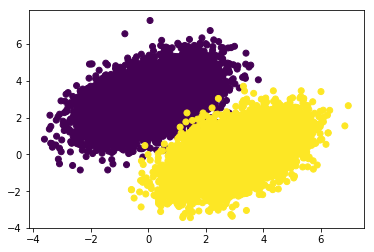

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

We will now train our linear regression by iterating over batch-by-batch over the data and repeatedly calling 'train_on_batch'. 

In [26]:
# Shuffling the data across
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# A Tensorflow trick to create an object for easy batched iteration. 
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size = 1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch size loss = %0.4f' % (epoch, float(loss)))

Epoch 0: last batch size loss = 0.0724
Epoch 1: last batch size loss = 0.0528
Epoch 2: last batch size loss = 0.0454
Epoch 3: last batch size loss = 0.0275
Epoch 4: last batch size loss = 0.0324
Epoch 5: last batch size loss = 0.0202
Epoch 6: last batch size loss = 0.0369
Epoch 7: last batch size loss = 0.0220
Epoch 8: last batch size loss = 0.0265
Epoch 9: last batch size loss = 0.0237


Testing model performance.

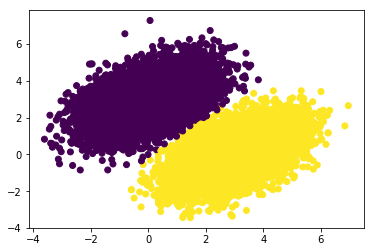

In [27]:
predictions = compute_predictions(features)
plt.scatter(features[:,0], features[:, 1], c = predictions [:, 0] > 0.5)

## Let's try and make the code faster with tf.function

In [28]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  t_end = time.time() - t0
  print('Time per epoch: %0.3f s' % (t_end / 20, ))

Time per epoch: 0.009 s
Time per epoch: 0.017 s
Time per epoch: 0.025 s
Time per epoch: 0.033 s
Time per epoch: 0.041 s
Time per epoch: 0.049 s
Time per epoch: 0.057 s
Time per epoch: 0.066 s
Time per epoch: 0.074 s
Time per epoch: 0.082 s
Time per epoch: 0.090 s
Time per epoch: 0.098 s
Time per epoch: 0.106 s
Time per epoch: 0.114 s
Time per epoch: 0.122 s
Time per epoch: 0.130 s
Time per epoch: 0.138 s
Time per epoch: 0.146 s
Time per epoch: 0.154 s
Time per epoch: 0.162 s


Building a static graph around the training function. 

In [0]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Let's try and find the time again. 

In [40]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  t_end = time.time() - t0
  print('Time per epoch: %0.3f s' % (t_end / 20, ))

Time per epoch: 0.014 s
Time per epoch: 0.017 s
Time per epoch: 0.021 s
Time per epoch: 0.025 s
Time per epoch: 0.029 s
Time per epoch: 0.033 s
Time per epoch: 0.036 s
Time per epoch: 0.040 s
Time per epoch: 0.044 s
Time per epoch: 0.048 s
Time per epoch: 0.052 s
Time per epoch: 0.055 s
Time per epoch: 0.060 s
Time per epoch: 0.064 s
Time per epoch: 0.068 s
Time per epoch: 0.072 s
Time per epoch: 0.075 s
Time per epoch: 0.079 s
Time per epoch: 0.083 s
Time per epoch: 0.086 s


So here as we can see, the Time per epoch (for the very last epoch) was reduced by ~45% which is a really neat way. 

As we will expect, in more complex models a static graph would save more time for the users and hence researchers loved Tensorflow 1.X which was without Eager Execution. 

## Using Keras API now. 

In [0]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Instantiate our layer.
linear_layer = Linear(4, 2)

We are going to call a layer instance like a function. 

In [0]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

In [0]:
# Weights are automatically tracked under the 'weights' property. 
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

## End-to-end training loop using MNSIT example. 

In [0]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
mlp = MLPWithDropout()
y_train = mlp(tf.ones((2, 2)), training=True)
y_test = mlp(tf.ones((2, 2)), training=False)

In [0]:
# We use an `Input` object to describe the shape and dtype of the inputs.
# This is the deep learning equivalent of *declaring a type*.
# The shape argument is per-sample; it does not include the batch size.
# The functional API focused on defining per-sample transformations.
# The model we create will automatically batch the per-sample transformations,
# so that it can be called on batches of data.
inputs = tf.keras.Input(shape=(16,))

# We call layers on these "type" objects
# and they return updated types (new shapes/dtypes).
x = Linear(32)(inputs) # We are reusing the Linear layer we defined earlier.
x = Dropout(0.5)(x) # We are reusing the Dropout layer we defined earlier.
outputs = Linear(10)(x)

# A functional `Model` can be defined by specifying inputs and outputs.
# A model is itself a layer like any other.
model = tf.keras.Model(inputs, outputs)

# A functional model already has weights, before being called on any data.
# That's because we defined its input shape in advance (in `Input`).
assert len(model.weights) == 4

# Let's call our model on some data.
y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [0]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [55]:
# Defining a Loss Class
# Binary Cross Entropy (BCE)
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.] # Targets
y_pred = [1., 1., 1., 0.] # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522857


In [56]:
# Metric Classes

m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate results:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate results: 0.6666667
Final result: 0.71428573
